# CE9010 Project - Group 4
# Brain Tumour Detection
 Sun Yun Qian Priscila & Lau Zhe Ru Zachary
<hr>

This whole notebook takes about 12 mins to run, exlcuding the section on L2 regularisation for convolutional neural network which takes around 1 hr and 45 mins to run due to many training iterations. 

# Problem Description
<hr>

This project aims to detect brain tumour using brain MRI images. 

# Data Acquisition
<hr>

__Instructions to use kaggle API to acquire dataset__
1. Create a kaggle account and create new API token. A <q>kaggle.json</q> file will be downloaded. 
2. Place the <q>kaggle.json</q> file under the directory: <q>C:\Users\YourUsername\.kaggle</q> (Note: Replace <q>YourUsername</q> in the directory with your username).<br><br>

__Alternatively, you can download the dataset directly [here](https://www.kaggle.com/navoneel/brain-mri-images-for-brain-tumor-detection)__ (Note: Save the dataset in the same directory as this notebook).
<hr>

In [1]:
import kaggle

In [2]:
#list datasets in the brain category
!kaggle datasets list -s brain

ref                                                          title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
mateuszbuda/lgg-mri-segmentation                             Brain MRI segmentation                           714MB  2019-05-02 21:32:45           4755        146  0.8235294        
usharengaraju/crimeagainstwomen                              sRNA sequencing - Brain (GSE75140)                25MB  2020-04-05 16:03:10            150        125  0.875            
navoneel/brain-mri-images-for-brain-tumor-detection          Brain MRI Images for Brain Tumor Detection        15MB  2019-04-14 15:15:54           8416        181  0.5              
wanghaohan/confused-eeg                                      Confused student EEG brainwav

In [3]:
#list files of a dataset
!kaggle datasets files navoneel/brain-mri-images-for-brain-tumor-detection

name           size  creationDate         
------------  -----  -------------------  
no/23 no.jpg    9KB  2019-04-14 15:15:52  
no/28 no.jpg    6KB  2019-04-14 15:15:52  
no/27 no.jpg    5KB  2019-04-14 15:15:52  
no/10 no.jpg    4KB  2019-04-14 15:15:52  
no/17 no.jpg    5KB  2019-04-14 15:15:52  
no/20 no.jpg    8KB  2019-04-14 15:15:52  
no/18 no.jpg    6KB  2019-04-14 15:15:52  
no/12 no.jpg    4KB  2019-04-14 15:15:52  
no/21 no.jpg    6KB  2019-04-14 15:15:52  
no/15 no.jpg    7KB  2019-04-14 15:15:52  
no/13 no.jpg    4KB  2019-04-14 15:15:52  
no/22 no.jpg    7KB  2019-04-14 15:15:52  
no/24 no.jpg    6KB  2019-04-14 15:15:52  
no/2 no.jpeg   78KB  2019-04-14 15:15:52  
no/26 no.jpg    7KB  2019-04-14 15:15:52  
no/14 no.jpg    6KB  2019-04-14 15:15:52  
no/11 no.jpg    3KB  2019-04-14 15:15:52  
no/25 no.jpg    8KB  2019-04-14 15:15:52  
no/19 no.jpg    6KB  2019-04-14 15:15:52  
no/1 no.jpeg   53KB  2019-04-14 15:15:52  
yes/Y108.jpg  111KB  2019-04-14 15:15:52  
yes/Y114.JP

In [4]:
#download dataset
!kaggle datasets download navoneel/brain-mri-images-for-brain-tumor-detection --unzip 


  0%|          | 0.00/15.1M [00:00<?, ?B/s]
  7%|6         | 1.00M/15.1M [00:00<00:03, 3.93MB/s]
 13%|#3        | 2.00M/15.1M [00:00<00:03, 4.13MB/s]
 20%|#9        | 3.00M/15.1M [00:00<00:02, 4.25MB/s]
 26%|##6       | 4.00M/15.1M [00:00<00:02, 4.59MB/s]
 33%|###3      | 5.00M/15.1M [00:01<00:02, 4.97MB/s]
 40%|###9      | 6.00M/15.1M [00:01<00:01, 5.20MB/s]
 46%|####6     | 7.00M/15.1M [00:01<00:01, 5.34MB/s]
 53%|#####2    | 8.00M/15.1M [00:01<00:01, 5.66MB/s]
 60%|#####9    | 9.00M/15.1M [00:01<00:01, 5.28MB/s]
 66%|######6   | 10.0M/15.1M [00:02<00:01, 5.25MB/s]
 73%|#######2  | 11.0M/15.1M [00:02<00:00, 5.61MB/s]
 79%|#######9  | 12.0M/15.1M [00:02<00:00, 6.04MB/s]
 86%|########6 | 13.0M/15.1M [00:02<00:00, 5.92MB/s]
 93%|#########2| 14.0M/15.1M [00:02<00:00, 6.07MB/s]
 99%|#########9| 15.0M/15.1M [00:02<00:00, 6.33MB/s]
100%|##########| 15.1M/15.1M [00:02<00:00, 5.55MB/s]


# Data Exploration & Pre-Processing
<hr>

In [5]:
import time
import random
import sklearn

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os #interact with file systems

import cv2 #pip install opencv-python (image functions)

After loading the dataset, assign variables with the proper file path for the "yes"(with tumour) and "no"(without tumour) set.

In [6]:
yes=os.listdir('./brain_tumor_dataset/yes')#returns a list containing the names of the jpg file in the directory
no=os.listdir('./brain_tumor_dataset/no')
print(yes[1])

Y10.jpg


We then decode the image into a 3 dimensional matrix: (height, width, colour channels). To verify that the dataset looks correct, let's plot the first raw image from the "yes" dataset. We can see that the image dimension of the first raw image is (218, 180, 3). This means that height of the raw image is 218 pixels, width is 180 pixels and there are 3 colour channels in the image matrix in the form of (Blue, Green, Red). 

[[[3 3 3]
  [3 3 3]
  [3 3 3]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[3 3 3]
  [3 3 3]
  [3 3 3]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[3 3 3]
  [3 3 3]
  [3 3 3]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 ...

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [2 2 2]
  [3 3 3]
  [3 3 3]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [1 1 1]
  [1 1 1]
  [2 2 2]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [1 1 1]
  [1 1 1]
  [2 2 2]]]
image dimensions= (218, 180, 3)


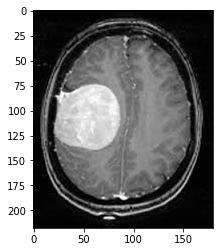

In [7]:
#show one raw training sample
img = cv2.imread('./brain_tumor_dataset/yes/'+yes[0])
#imread() decodes the image into a 3-dimensiomal matrix: (height,width,colour channels)
print(img)
print("image dimensions=",img.shape)
#Height of the raw image is 218 pixels, width is 180 pixels and there are 3 colour channels in the matrix(Blue, Green and Red)
from matplotlib import pyplot as plt
plt.imshow(img, interpolation='nearest')
plt.show()

Before we can feed the data into sklearn packages, we need to resize all images (both "yes" and "no" set) into the same size (224x224x3). For simplicity, we will convert the images into grey scale, which will simplify the image dimension to (224x224). You can see that height of the image is now 224 pixels, width is 224. Each element in the array represents grey scale value, which is calculated by taking the average of color channels at the respective pixel.

In [8]:
#resize all image to the same size (224,224) and place them in lists
X=[]
for file in yes:
    img = cv2.imread('./brain_tumor_dataset/yes/'+file)
    img = cv2.resize(img, (224, 224) )#Height of image is 224 pixels, width is 224 pixels and there are 3 colour channels in the array (Blue,green,red)   
    img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#convert image to grey scale image
    X.append(img)

for file in no:
    img = cv2.imread('./brain_tumor_dataset/no/'+file)
    img = cv2.resize(img, (224, 224) )
    img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    X.append(img)


image dimensions= (224, 224)


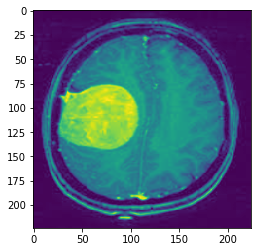

In [9]:
#visualise the first processed image stored in X
print("image dimensions=",X[0].shape)#an image has height 224, width 224 and there is only 1 dimension for grey scale values
plt.imshow(X[0], interpolation='nearest')

You can see that there are a total of 253 processed image matrices (from both "yes" and "no" set) of size (224x224) stored in X. 

In [10]:
X = np.asarray(X)#convert the list of image matrices to an array
print('Shape of matrix with image stored as matrices(224x224) =',X.shape)

# number of data
n = X.shape[0] 
print('Number of training data=',n)

Shape of matrix with image stored as matrices(224x224) = (253, 224, 224)
Number of training data= 253


Visualise the first 6 sample images from X:

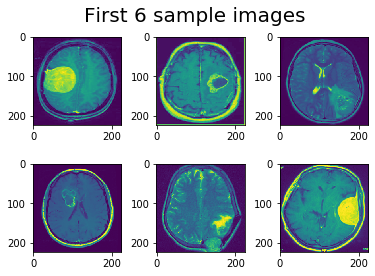

In [11]:
#Visualise
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def plot_images(X,start,end,r,c,title=None):
    """X is an array containing image arrays of size (224,224); r is row; c is column; 
    start is start index; end is end index;
    Output images arrange in grid rxc"""
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.4, wspace=0.4)#adjust spacing between plots
    for i in range(start+1, end+1):#visualise first 6 image
        ax = fig.add_subplot(r, c, i)
        ax.imshow(X[i-1], interpolation='nearest')
    fig.suptitle(title, fontsize=20)
        
plot_images(X,0,6,2,3,"First 6 sample images")


Pixel values are often integers in the range between 0 and 255, which can be computationally expensive for our models. To lower computational cost, we can normalise pixel values to a range between zero and one.

In [12]:
#normalize data
X = X.astype('float32')
X /= 255

We then flatten all the 2D image matrices (224x224) into a 1D array of size 224*224=50176 features.

Shape of matrix with image stored as flattened arrays in rows = (253, 50176)


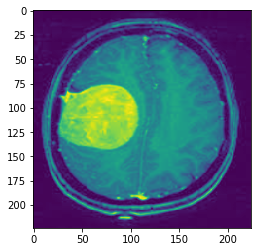

In [13]:
# create matrix with image stored as flattened arrays in rows
X = np.array([X[i].flatten()
              for i in range(n)],'f')
#flatten() converts each image matrix (224,224) to a one-dimensional array of size 224*224=50176 features.
#because sklearn functions takes in training data, X, with shape (n_samples,n_features)

print('Shape of matrix with image stored as flattened arrays in rows =',X.shape)
plt.imshow(X[0].reshape(224,224), interpolation='nearest')#need to reshape flattened arrays to (224x224) to visualise image

Create an array, y, which consists of the image labels. Images from the "yes" (tumour present) set will be assigned class 1 while images from the "no"(tumour absent) set will be assigned class 0.

In [14]:
#Create y-labels
yes_labels=np.full(len(yes),1)
no_labels=np.full(len(no),0)
y=np.concatenate([yes_labels,no_labels])
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

We split the dataset into 70% of training data and 30% of testing data

In [15]:
#split data: 70% train and 30% test
n=len(X)#total number of image
index = np.arange(0,n,1)
len_train = round(n*0.7)
len_test = n-len_train
print ("total number of data: ",n)
print ("number of train data :",len_train,"number of test data :",len_test)

total number of data:  253
number of train data : 177 number of test data : 76


To do so, we randomly sample 76 indexes for our test set and assign them to variable test_index. Image matrices with index in test_index will be assigned to the test set while the rest of the image matrices with index __not__ in test_index will be assigned to the train set. 

In [16]:
#split flattened image data into training set and test set
from random import sample
X_train, X_test= [],[]
y_train, y_test= [],[]
#test_index = sample(set(index), len_test)# Prints list of random index of given length len_test
test_index= [134, 33, 236, 222, 103, 125, 70, 234, 226, 7, 14, 69, 191, 142, 51, 246, 12, 2, 84, 130, 50, 173, 200, 76, 35, 
             102, 54, 114, 149, 178, 189, 186, 161, 115, 184, 91, 235, 121, 32, 238, 133, 243, 56, 118, 137, 247, 87, 135, 80, 198, 65, 
             194, 228, 40, 73, 116, 241, 220, 197, 19, 187, 188, 219, 218, 126, 227, 15, 78, 34, 185, 96, 8, 150, 113, 67, 167]

print('test_index=',test_index)

for i in range(n):
    if i in test_index:
        X_test.append(X[i])
        y_test.append(y[i])
    else:
        X_train.append(X[i])
        y_train.append(y[i])

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)



test_index= [134, 33, 236, 222, 103, 125, 70, 234, 226, 7, 14, 69, 191, 142, 51, 246, 12, 2, 84, 130, 50, 173, 200, 76, 35, 102, 54, 114, 149, 178, 189, 186, 161, 115, 184, 91, 235, 121, 32, 238, 133, 243, 56, 118, 137, 247, 87, 135, 80, 198, 65, 194, 228, 40, 73, 116, 241, 220, 197, 19, 187, 188, 219, 218, 126, 227, 15, 78, 34, 185, 96, 8, 150, 113, 67, 167]


In [17]:
#check shapes of train and test data

print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train: (177, 50176)
Shape of X_test: (76, 50176)
Shape of y_train: (177,)
Shape of y_test: (76,)


# Principal Component Analysis (PCA)
<hr>

Currently, we have a very high dimensional data with 50176 features! With principal component analysis(PCA), we can effectively reduce the dimensionality of our dataset to reduce memory needed for the data and speed up learning speed. 

What PCA does is it projects the image data from a higher dimensional space (50176 dimensions) into a lower dimensional space (k dimensions).These k dimensions are nothing but the k Principal Components that captures (or holds) most of the variance (information) of our data.

In [18]:
#PCA
from sklearn.decomposition import PCA
t = time.time()
pca = PCA(svd_solver='randomized')
X_pca = pca.fit_transform(X)
print ('Time: ',time.time()-t)

Time:  12.135467529296875


Covariance matrix is a dxd matrix which encodes all data variations. d is the number of dimensions, which is 50176 in our case. Therefore, our covariance matrix will be a 50176x50176 matrix as shown below.

In [19]:
#Covariance
#Long run Time:  98.02181911468506
t = time.time()
print(pca.get_covariance().shape)
print('Time: ',time.time()-t)

(50176, 50176)
Time:  104.54125618934631


Principal directions are computed by the eigenvalue decomposition(EVD) of the co-variance matrix. Data variations are captured by each principle directions. The first principal direction captures the largest data variance and the second principal direction captures the second largest data variance and so on...

Principal components are computed by projecting image data matrix X on principal directions to get compressed data. 

Let's visualise the principal components. You can see that features with the largest variation are explained by first 6 components. The middle components show much less imformation. Last few components are mostly noise.

[0.00287406 0.00297424 0.00263008 ... 0.00414187 0.00421842 0.00420818]
(50176,)
total number of principal components= 253
(253, 224, 224)


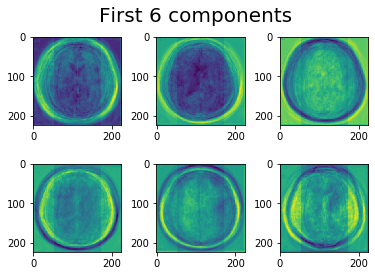

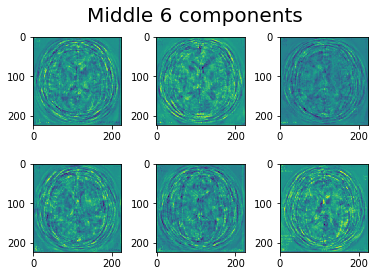

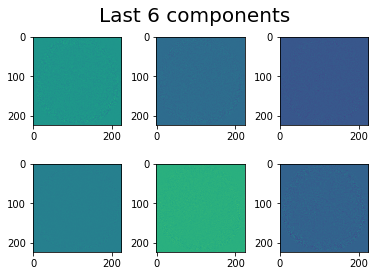

In [20]:
print(pca.components_[0])
print(pca.components_[0].shape)
n_pca=pca.components_[:].shape[0]
print("total number of principal components=",n_pca)
#plt.imshow(pca.components_[0].reshape(224,224), interpolation='nearest')


#create an array containing all principal components of size (224,224) because plot_images takes an array containing image matrices of size (224,224) as input
prin_comp=[]
for i in range(n_pca):
    prin_comp.append(pca.components_[i].reshape(224,224))
prin_comp=np.asarray(prin_comp)
print(prin_comp.shape)


plot_images(prin_comp[:6],0,6,2,3,"First 6 components")
plot_images(prin_comp[(int)(n_pca/2)-6:(int)(n_pca/2)],0,6,2,3,"Middle 6 components")
plot_images(prin_comp[n_pca-6:n_pca],0,6,2,3,"Last 6 components")

Find number of principle components that captures 95% of variance.

In [21]:
#variance
k = 0
var = 0
while var < 0.95 :
    var = var + pca.explained_variance_ratio_[k]
    k = k + 1
k -= 1

print('k=',k)
print('captured variance=',var)

k= 131
captured variance= 0.9503931704675779


Let's plot the cumulative variance with different number of components. We can see that over 95% of variation can be captured by first k principal components.

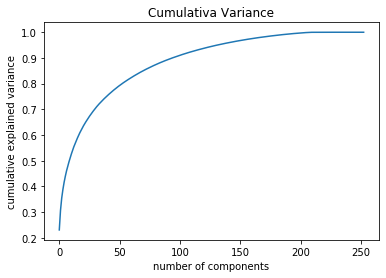

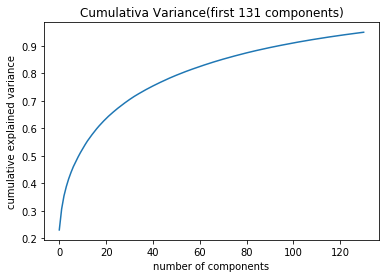

In [22]:
#Cumulative variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('Cumulativa Variance')
plt.show()
plt.plot(np.cumsum(pca.explained_variance_ratio_[:k]))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('Cumulativa Variance(first %i components)' %k)
plt.show()

We then run PCA with k components

In [23]:
#run PCA with k components
t = time.time()
pca = PCA(n_components = k, svd_solver='randomized')
X_pca = pca.fit_transform(X)#returns training data with shape (n_samples, n_components=k)
projected = pca.inverse_transform(X_pca)#transform training data with only first k principal components back to its original space, with shape (n_samples, n_features)
print('Time: ',time.time()-t)

Time:  3.5062901973724365


In [24]:
print(X_pca.shape)#reduced to k features
print(projected.shape)
print(X.shape)

(253, 131)
(253, 50176)
(253, 50176)


Comparing the processed images with the original ones, most of variances are maintained after dimension reduction.

(177, 224, 224)
k= 131
(177, 224, 224)


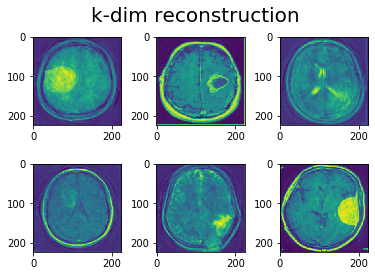

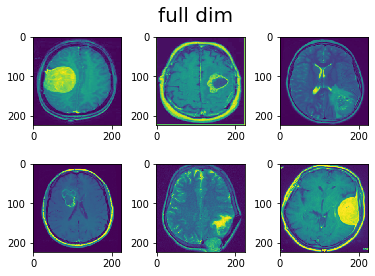

In [25]:
#Visualise the reconstructed sample images from only the first k principal components 

#create an array containing image matrices of size (224,224) because plot_images takes an array containing image matrices of size (224,224) as input
proj_img=[]
for i in range(len_train):#len_train=number of training data
    proj_img.append(projected[i].reshape(224,224))
proj_img=np.asarray(proj_img)
print(proj_img.shape)

#Show principle components
print("k=",k)
plot_images(proj_img[:6],0,6,2,3,"k-dim reconstruction")#plot first 6 sample images from training data (k-dimension)

#Visualise first 6 sample images from training data (full dimension)

#create an array containing image matrices of size (224,224) because plot_images takes an array containing image matrices of size (224,224) as input
X_img=[]
for i in range(len_train):#len_train=number of training data
    X_img.append(X[i].reshape(224,224))
X_img=np.asarray(X_img)
print(X_img.shape)

#Show first 6 sample images from training data (full dim)
plot_images(X_img[:6],0,6,2,3,"full dim")


We split the image data with reduced dimensions (PCA) into 70% of training data and 30% of testing data by using the same indexes for the original training set and test set as defined above. This is to ensure that the only difference between the new train/test sets (i.e. X_train_pca, X_test_pca) and original train/test sets (i.e. X_train, X_test) will be the dimensions/number of features for each image data. 

In [26]:
#split flattened image data with reduced dimensions (PCA) into training set and test set
from random import sample
X_train_pca, X_test_pca= [],[]
print('test_index=',test_index)
#use the same indexes for both X_test and X_test_pca to generate the same image data for both test sets
#only difference will be the dimensions/number of features for each image data
#labels in both train and test set after dimensionality reduction(PCA) will remain the same as the orginal train and test set

for i in range(n):
    if i in test_index:
        X_test_pca.append(X_pca[i])

    else:
        X_train_pca.append(X_pca[i])

X_train_pca = np.asarray(X_train_pca)
X_test_pca = np.asarray(X_test_pca)


test_index= [134, 33, 236, 222, 103, 125, 70, 234, 226, 7, 14, 69, 191, 142, 51, 246, 12, 2, 84, 130, 50, 173, 200, 76, 35, 102, 54, 114, 149, 178, 189, 186, 161, 115, 184, 91, 235, 121, 32, 238, 133, 243, 56, 118, 137, 247, 87, 135, 80, 198, 65, 194, 228, 40, 73, 116, 241, 220, 197, 19, 187, 188, 219, 218, 126, 227, 15, 78, 34, 185, 96, 8, 150, 113, 67, 167]


You can see that the new train/test sets will have k dimensions/features while the original train/test sets have 50176 dimensions/features. 

In [27]:
#check shapes of new train and test data (reduced dimensions)

print("Shape of X_train_pca:",X_train_pca.shape)
print("Shape of X_test_pca:",X_test_pca.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train_pca: (177, 131)
Shape of X_test_pca: (76, 131)
Shape of y_train: (177,)
Shape of y_test: (76,)


Important: There is no gaurantee that applying PCA will improve the performance of the learning algorithm. In fact, PCA usually decreases the accuracy since lesser features means lesser information. PCA is usally used to improve the speed of the algorithm runtime, which we will see in later examples.

# Compute Accuracy

Accuracy is one of the ways to evaluate the performance of our classifiers. 

In [28]:
# Compute Accuracy
def compute_accuracy(y_pred,y):
    diff = (y_pred == y).astype('int')
    accuracy = sum(diff)/ y.shape[0]
    
    return accuracy

# Unsupervised Classification - K-means
<hr>

## K-means Clustering with PCA

First, let's try using the processed data with reduced dimensions to apply K-means clustering. 

Since K-means is a form of unsupervised clustering, class labels may be swapped during the clustering into 2 arbitrary classes i.e. class 1 (tumour present) is assigned 0 and class 0 (tumour absent) is assigned 1. If accuracy is less than 50%, it is likely that the labels are swapped. Therefore, if accuracy is less than 50%, we will swap the class labels. 

In [29]:
#if class labels are reversed
def reverse(y_kmeans):
    where_0 = np.where(y_kmeans == 0)
    where_1 = np.where(y_kmeans == 1)

    y_kmeans[where_0] = 1
    y_kmeans[where_1] = 0
    return y_kmeans
    
    

In [30]:
print('k=',k)
print('Shape of X_train_pca=',X_train_pca.shape)

k= 131
Shape of X_train_pca= (177, 131)


To reduce dependence with respect to initialisation, We repeat the following K-means algorithm 100 times with random initialisation of centroids each time. 

Inputs: 
- no of clusters/ <i>n_clusters</i>  = 2
- Training set (nxd)/ <i>X_train_pca</i>, n(number of training data)=177, d(number of features)= k(reduced no of features)

K-means algorithm:
- initialisation: Randomly initialise 2 centroids/means
- Repeat until convergence:
    1. Cluster assignment (0 or 1)
    2. Means update

Outputs:
- clusters for training set/ <i>y_kmeans_pca</i> 
- K-means loss

We then save the clusters in <i>clust_iters</i> and loss value in <i>L_iters</i> for each run.

In [31]:
#K means Clustering
t = time.time()
from sklearn.cluster import KMeans
def kmeans_random(X_train_pca,k):
    L_iters= np.zeros(100)#record kmeans loss values
    #c_iters= np.zeros((100,2,k))#record 2 centroids, with k dimension each
    clust_iters= np.zeros((100,X_train_pca.shape[0]))#record clusters
    for i in range(100):#repeat kmeans algorithm 100 times with random initialisation
        kmeans = KMeans(n_clusters=2, init='random',n_init=1)#initialise random centroids 
        kmeans.fit(X_train_pca)#compute kmeans clustering
        y_kmeans_pca = kmeans.predict(X_train_pca)#compute kmeans prediction labels
        L_iters[i]=kmeans.inertia_/y_kmeans_pca.shape[0]#save current kmeans loss values
        #c_iters[i]=kmeans.cluster_centers_#save current centroids
        clust_iters[i]=y_kmeans_pca#save current clusters
        print('iter=',i+1,'; Kmeans loss=',L_iters[i])
    return L_iters, clust_iters
       
L_iters, clust_iters=kmeans_random(X_train_pca,k)#input X_train_pca with shape (177,k) 
print('Time: ',time.time()-t)

iter= 1 ; Kmeans loss= 1600.1951386315911
iter= 2 ; Kmeans loss= 1590.4345711510232
iter= 3 ; Kmeans loss= 1600.1951386315911
iter= 4 ; Kmeans loss= 1590.4345711510232
iter= 5 ; Kmeans loss= 1590.4345711510232
iter= 6 ; Kmeans loss= 1590.4345711510232
iter= 7 ; Kmeans loss= 1588.6721662169139
iter= 8 ; Kmeans loss= 1588.6721662169139
iter= 9 ; Kmeans loss= 1588.6721662169139
iter= 10 ; Kmeans loss= 1590.4345711510232
iter= 11 ; Kmeans loss= 1590.4345711510232
iter= 12 ; Kmeans loss= 1600.1951386315911
iter= 13 ; Kmeans loss= 1590.4345711510232
iter= 14 ; Kmeans loss= 1590.4345711510232
iter= 15 ; Kmeans loss= 1873.9042439346267
iter= 16 ; Kmeans loss= 1879.2953003386021
iter= 17 ; Kmeans loss= 1600.1951386315911
iter= 18 ; Kmeans loss= 1600.1951386315911
iter= 19 ; Kmeans loss= 1588.6721662169139
iter= 20 ; Kmeans loss= 1588.4413388003109
iter= 21 ; Kmeans loss= 1588.6721662169139
iter= 22 ; Kmeans loss= 1600.1951386315911
iter= 23 ; Kmeans loss= 1600.1951386315911
iter= 24 ; Kmeans lo

We pick the solution with the smallest loss value

In [32]:
#find index of the minimum kmeans loss
L_iters=list(L_iters)#convert array L_iters to list so that we can use list functions as below
index=L_iters.index(min(L_iters))
print('min kmeans loss=',min(L_iters))
print('min index=',index)

min kmeans loss= 1588.4413388003109
min index= 19


In [33]:
#pick the solution with min kmeans loss value
y_kmeans_pca=clust_iters[index]
y_kmeans_pca=y_kmeans_pca.astype('int32')
print(y_kmeans_pca)

[1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1
 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


If accuracy is less than 50%, it is likely that the labels are swapped. 

In [34]:
#kmeans is a form of unsupervised clustering. Therfore, class labels may be swapped during the clustering process.  
#If accuracy is less than 50%, it is likely that the labels are swapped.
if compute_accuracy(y_kmeans_pca,y_train)<0.5:
    y_kmeans_pca=reverse(y_kmeans_pca)

In [35]:
#kmeans prediction labels
print(y_kmeans_pca)

[0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0
 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [36]:
#actual labels
print(y_train)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


We then compute the accuracy. You can see that the accuracy for k-means clustering with reduced dimensions (PCA) is around 50-60%. This is not very good as close to 50% means that the prediction is pretty much random. 

Moreover, we do not know what features are explained by the first k principal components used in this algorithm. We only know that the features used capture 95% variance of the data. There is no gaurantee that features with the most variance in the image data are meaningful features!

In [37]:
#compute accuracy
print('accuracy (with pca)=',compute_accuracy(y_kmeans_pca,y_train))

accuracy (with pca)= 0.559322033898305


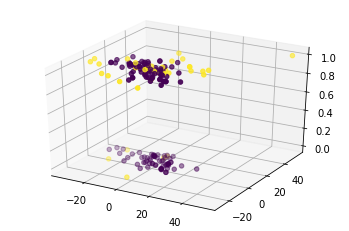

In [38]:
#3D plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs =X_train_pca[:, 1] , ys =  X_train_pca[:,2], zs= y_train ,s=20, c=y_kmeans_pca, depthshade=True)

In the 3D plot, two colors represent two different clusters. The top part(with z-axis = 1) is samples with brain tumour, and the bottom part(with z-axis = 0) indicates samples with no brain tumour. x-axis is the second principal component of PCA, and y-axis is the third principal component. 

As you can see, there is no clear relationship between data separated by presence and absence of brain tumour and data seperated by k-means clustering.

## K-means Clustering without PCA

Since PCA may worsen the performance of the learning algorithm due to lesser features/information to learn from, we will try K-means clustering without PCA. This time, training set will have 50176 number of dimensions/features. You can see that without PCA, K-means runtime will be much longer as compared to K-means with PCA. 

In [39]:
print('Shape of X_train=',X_train.shape)

Shape of X_train= (177, 50176)


In [40]:
#K means clustering
#Note:long runtime (93 seconds) compared to with pca
t = time.time()
L_iters, clust_iters=kmeans_random(X_train,X_train.shape[1])
print('Time: ',time.time()-t)

iter= 1 ; Kmeans loss= 1691.831959589448
iter= 2 ; Kmeans loss= 1703.3387385682643
iter= 3 ; Kmeans loss= 1691.831959589448
iter= 4 ; Kmeans loss= 1703.3387385682643
iter= 5 ; Kmeans loss= 1691.5813970307636
iter= 6 ; Kmeans loss= 1703.3387385682643
iter= 7 ; Kmeans loss= 1703.3387385682643
iter= 8 ; Kmeans loss= 1693.591785336793
iter= 9 ; Kmeans loss= 1703.3387385682643
iter= 10 ; Kmeans loss= 1703.3387385682643
iter= 11 ; Kmeans loss= 1691.5813970307636
iter= 12 ; Kmeans loss= 1693.591785336793
iter= 13 ; Kmeans loss= 1693.591785336793
iter= 14 ; Kmeans loss= 1691.5813970307636
iter= 15 ; Kmeans loss= 1693.591785336793
iter= 16 ; Kmeans loss= 1703.3387385682643
iter= 17 ; Kmeans loss= 1703.3387385682643
iter= 18 ; Kmeans loss= 1703.3387385682643
iter= 19 ; Kmeans loss= 1703.3387385682643
iter= 20 ; Kmeans loss= 1703.3387385682643
iter= 21 ; Kmeans loss= 1703.3387385682643
iter= 22 ; Kmeans loss= 1691.5813970307636
iter= 23 ; Kmeans loss= 1691.831959589448
iter= 24 ; Kmeans loss= 169

We pick the solution with the smallest loss value

In [41]:
#find index of the minimum kmeans loss
L_iters=list(L_iters)
index=L_iters.index(min(L_iters))
print('min kmeans loss=',min(L_iters))
print('min index=',index)

min kmeans loss= 1691.5813970307636
min index= 4


In [42]:
#pick the solution with min kmeans loss value
y_kmeans=clust_iters[index]
y_kmeans=y_kmeans.astype('int32')
print(y_kmeans)

[1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1
 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


If accuracy is less than 50%, it is likely that the labels are swapped. 

In [43]:
#kmeans is a form of unsupervised clustering. Therfore, class labels may be swapped during the clustering process.  
#If accuracy is less than 50%, it is likely that the labels are swapped.
if compute_accuracy(y_kmeans,y_train)<0.5:
    y_kmeans=reverse(y_kmeans)

In [44]:
#kmeans prediction labels
print(y_kmeans)

[0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0
 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [45]:
#actual labels
print(y_train)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


We then compute the accuracy. You can see that the accuracy for k-means clustering without PCA is also around 50-60%. This means that the remaining 5% variance not captured by the first k principal components are indeed just noise. 

In [46]:
#compute accuracy
print('accuracy (no pca)=',compute_accuracy(y_kmeans,y_train))
#In general, applying PCA before building a model will NOT help to make the model perform better (in terms of accuracy)!
#This is because PCA is an algorithm that does not consider the response variable / prediction target into account. PCA will treat the feature has large variance as important features, but the feature has large variance can have noting to do with the prediction target.
#This means, you can produce a lot of useless features and eliminate useful features after PCA.
#Instead, The main benefit to PCA is reducing the size of your feature vectors for computational efficiency. 
#PCA is used to remove the least beneficial features so you have a smaller data set, but without losing too much predictive power.


accuracy (no pca)= 0.559322033898305


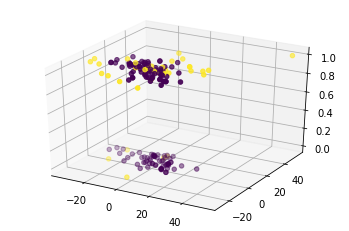

In [47]:
#3D plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs =X_train_pca[:, 1] , ys =  X_train_pca[:,2], zs= y_train ,s=20, c=y_kmeans, depthshade=True)

In the 3D plot, two colors represent two different clusters. The top part(with z-axis = 1) is samples with brain tumour, and the bottom part(with z-axis = 0) indicates samples with no brain tumour. x-axis is the second dimension, and y-axis is the third dimension. 

As you can see, there is no clear relationship between data separated by presence and absence of brain tumour and data seperated by k-means clustering.

## K-means ++ Clustering with PCA

Before we give up on K-means, let's try K-means ++ which improves the quality of the clustering by implementing smarter initialisation. Apart from initialisation, the rest of the algorithm is the same as the K-means algorithm above. 

K-means++ initialisation:
1. Randomly select the first centroid from the data points. For each data point compute its distance from the first centroid.
2. The probability that a point is chosen as the second centriod is directly proportional to its distance from the first centriod.

Hence, using kmeans++ initialisation will help us pick up centroids which are far away from one another. This increases the chances of initially picking up centroids that lie in different clusters, which increase the chances for the algorithm to find a global solution. 

In [48]:
print('k=',k)
print('Shape of X_train_pca=',X_train_pca.shape)

k= 131
Shape of X_train_pca= (177, 131)


In [49]:
#K means++ clustering
t = time.time()
from sklearn.cluster import KMeans
def kmeans_plus(X_train_pca,k):
    L_iters= np.zeros(100)#record kmeans loss values
    #c_iters= np.zeros((100,2,k))#record 2 centroids, with k dimension each
    clust_iters= np.zeros((100,X_train_pca.shape[0]))#record clusters
    for i in range(100):#repeat kmeans algorithm 100 times with random initialisation of first centroid
        kmeans = KMeans(n_clusters=2, init='k-means++',n_init=1)#initialise with kmeans++ 
        kmeans.fit(X_train_pca)#compute kmeans clustering
        y_kmeans_pca = kmeans.predict(X_train_pca)#compute kmeans prediction labels
        L_iters[i]=kmeans.inertia_/y_kmeans_pca.shape[0]#save current kmeans loss values
        #c_iters[i]=kmeans.cluster_centers_#save current centroids
        clust_iters[i]=y_kmeans_pca#save current clusters
        print('iter=',i+1,'; Kmeans loss=',L_iters[i])
    return L_iters, clust_iters
       
L_iters, clust_iters=kmeans_plus(X_train_pca,k)#input X_train_pca with shape (177,k) 
print('Time: ',time.time()-t)

iter= 1 ; Kmeans loss= 1590.4345711510232
iter= 2 ; Kmeans loss= 1590.4345711510232
iter= 3 ; Kmeans loss= 1600.1951386315911
iter= 4 ; Kmeans loss= 1590.4345711510232
iter= 5 ; Kmeans loss= 1590.4345711510232
iter= 6 ; Kmeans loss= 1600.1951386315911
iter= 7 ; Kmeans loss= 1600.1951386315911
iter= 8 ; Kmeans loss= 1600.1951386315911
iter= 9 ; Kmeans loss= 1590.4345711510232
iter= 10 ; Kmeans loss= 1590.4345711510232
iter= 11 ; Kmeans loss= 1590.4345711510232
iter= 12 ; Kmeans loss= 1600.1951386315911
iter= 13 ; Kmeans loss= 1588.6721662169139
iter= 14 ; Kmeans loss= 1588.6721662169139
iter= 15 ; Kmeans loss= 1590.4345711510232
iter= 16 ; Kmeans loss= 1590.4345711510232
iter= 17 ; Kmeans loss= 1590.4345711510232
iter= 18 ; Kmeans loss= 1590.4345711510232
iter= 19 ; Kmeans loss= 1590.4345711510232
iter= 20 ; Kmeans loss= 1588.4413388003109
iter= 21 ; Kmeans loss= 1590.4345711510232
iter= 22 ; Kmeans loss= 1588.6721662169139
iter= 23 ; Kmeans loss= 1590.4345711510232
iter= 24 ; Kmeans lo

We pick the solution with the smallest loss value

In [50]:
#find index of the minimum kmeans loss
L_iters=list(L_iters)#convert array L_iters to list so that we can use list functions as below
index=L_iters.index(min(L_iters))
print('min kmeans loss=',min(L_iters))
print('min index=',index)

min kmeans loss= 1588.4413388003109
min index= 19


In [51]:
#pick the solution with min kmeans loss value
y_kmeans_pca=clust_iters[index]
y_kmeans_pca=y_kmeans_pca.astype('int32')
print(y_kmeans_pca)

[1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1
 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


If accuracy is less than 50%, it is likely that the labels are swapped. 

In [52]:
#kmeans is a form of unsupervised clustering. Therfore, class labels may be swapped during the clustering process.  
#If accuracy is less than 50%, it is likely that the labels are swapped.
if compute_accuracy(y_kmeans_pca,y_train)<0.5:
    y_kmeans_pca=reverse(y_kmeans_pca)

In [53]:
#kmeans prediction labels
print(y_kmeans_pca)

[0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0
 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [54]:
#actual labels
print(y_train)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


We then compute the accuracy. You can see that the accuracy for k-means++ clustering (with PCA) is also around 50-60%. This means that the poor performance of K-means clustering is not due to poor initialisation that leads to a local solution instead of a global one. 

Also, we probably have already accounted for initialisation issues with random initialisation by running the K-MEANS algorithm 100 times and picking the solution with the smallest loss value. 

In [55]:
#compute accuracy
print('accuracy (with pca)=',compute_accuracy(y_kmeans_pca,y_train))

accuracy (with pca)= 0.559322033898305


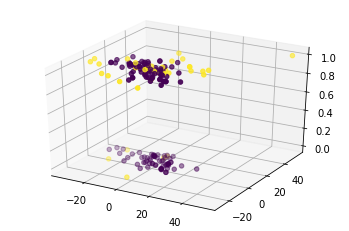

In [56]:
#3D plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs =X_train_pca[:, 1] , ys =  X_train_pca[:,2], zs= y_train ,s=20, c=y_kmeans_pca, depthshade=True)

In the 3D plot, two colors represent two different clusters. The top part(with z-axis = 1) is samples with brain tumour, and the bottom part(with z-axis = 0) indicates samples with no brain tumour. x-axis is the second principal component of PCA, and y-axis is the third principal component. 

As you can see, there is no clear relationship between data separated by presence and absence of brain tumour and data seperated by k-means clustering.

# Supervised Classification - Logistic Regression
<hr>

Next, we tried classifying the images using logistic regression. We used the linear logistic regression model from Sklearn to model this.

## Logistic Regression without PCA

To start, we trained the model using X matrix without PCA and evaluated its performance. 


In [63]:
# run logistic regression with scikit-learn without PCA for train set
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# creating log reg model and fitting train set without PCA
start = time.time()
logreg_sklearn = LogisticRegression(C=1, max_iter=300) # scikit-learn logistic regression
logreg_sklearn.fit(X_train, y_train)
print('Time=',time.time() - start)

# predict using fitted model on train set without PCA
y_logreg_train = logreg_sklearn.predict(X_train)
print('accuracy of train set (no pca)=',compute_accuracy(y_logreg_train[:,None],y_train[:,None]))

# finding loss of logistic regression without PCA
logloss_train = sklearn.metrics.log_loss(y_train, y_logreg_train, eps=1e-15, normalize=True, sample_weight=None, labels=None)
print('loss of train set (no pca)=',logloss_train)

Time= 3.2208545207977295
accuracy of train set (no pca)= [1.]
loss of train set (no pca)= 9.992007221626413e-16


In [64]:
# run logistic regression with scikit-learn without PCA for test set
# predict using fitted model on test set without PCA
y_logreg_test = logreg_sklearn.predict(X_test)
print('accuracy of test set (no pca)=',compute_accuracy(y_logreg_test,y_test))
logloss_test = sklearn.metrics.log_loss(y_test, y_logreg_test, eps=1e-15, normalize=True, sample_weight=None, labels=None)
print('loss of test set (no pca)=',logloss_test)

accuracy of test set (no pca)= 0.7763157894736842
loss of test set (no pca)= 7.7258736196099145


The accuracy of logistic regression without PCA was 77.6 %. This is better than K-means clustering, which is expected since the former is supervised classification whereas the latter is unsupervised. 

## Logistic Regression with PCA

Next, we tried logistic regression with PCA to try to improve model accuracy and speed using the linear logistic regression model from Sklearn once again. 

In [65]:
# logistic regression on train set with PCA
from sklearn.linear_model import LogisticRegression

# creating log reg model and fitting train set with PCA
start = time.time()
logreg_sklearn_pca = LogisticRegression(C=1, max_iter=300) # scikit-learn logistic regression
logreg_sklearn_pca.fit(X_train_pca, y_train) # learn the model parameters with k=101 principal components (X_train_pca=(n_samples, n_compenents) for training data)
print('Time=',time.time() - start)

# predict using fitted model on train set with PCA
y_logreg_train_pca = logreg_sklearn_pca.predict(X_train_pca)
print('accuracy of train set (with pca)=',compute_accuracy(y_logreg_train_pca,y_train))

# finding loss of logistic regression with PCA
logloss_train_pca = sklearn.metrics.log_loss(y_train, y_logreg_train_pca, eps=1e-15, normalize=True, sample_weight=None, labels=None)
print('loss of train set (with pca)=',logloss_train_pca)

Time= 0.057412147521972656
accuracy of train set (with pca)= 1.0
loss of train set (with pca)= 9.992007221626413e-16


In [66]:
# run logistic regression with scikit-learn with PCA for test set
# predict using fitted model on test set with PCA
y_logreg_test_pca = logreg_sklearn_pca.predict(X_test_pca)
print('accuracy of test set (with pca)=',compute_accuracy(y_logreg_test_pca,y_test))
logloss_test_pca = sklearn.metrics.log_loss(y_test, y_logreg_test_pca, eps=1e-15, normalize=True, sample_weight=None, labels=None)
print('loss of test set (with pca)=',logloss_test_pca)

accuracy of test set (with pca)= 0.7368421052631579
loss of test set (with pca)= 9.089246372040598


With PCA, the accuracy attained was 73.7 %, which is lower than the accuracy value without PCA. However, the time taken was 2 orders of magnitude faster for the former. The lower accuracy was likely due to the removal of important components after PCA. Therefore, we decided to stick with the logistic regression model trained without PCA.

## Tuning of Regularisation Parameter, $\lambda$

The training accuracy was 100 % while the test accuracy achieved was lower at 77 %, suggesting that there was an overfitting problem. To combat this, we tried to tune $\lambda$ for better generalisation. A sensitivity analysis was done over a range of $\lambda$ values as shown below. 

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# range of parameter powers to test
lr_param_start, lr_param_end = -6,6
lr_param, lr_trainlist, lr_testlist = [],[],[]

for i in range(lr_param_start,lr_param_end+1):
    param = 10**i
    start = time.time()
    lr_sklearn = LogisticRegression(C=param, max_iter=300) # scikit-learn logistic regression
    lr_sklearn.fit(X_train, y_train)
    endtime = time.time() - start
    # logistic regression on train set
    y_lr_train = lr_sklearn.predict(X_train)
    # logistic regression on test set using same model
    y_lr_test = lr_sklearn.predict(X_test)
    # compute accuracies
    lr_train_acc = compute_accuracy(y_lr_train[:,None],y_train[:,None])
    lr_test_acc = compute_accuracy(y_lr_test[:,None],y_test[:,None])
    print('Reg. parameter: %15f, Train accuracy: %.3f, Test accuracy: %.3f, Time: %.3f' % (1/param, lr_train_acc, lr_test_acc, endtime))
    # updating lists for parameter tested and accuracies for each iteration
    lr_param.append(1/param) # lambda = 1/C = 1/param
    lr_trainlist.append(lr_train_acc)
    lr_testlist.append(lr_test_acc)
    # finding loss of logistic regression without PCA
    #logloss_train = sklearn.metrics.log_loss(y_train, y_lr_train, eps=1e-15, normalize=True, sample_weight=None, labels=None)
    #print('loss of train set (no pca)=',logloss_train)

Reg. parameter:  1000000.000000, Train accuracy: 0.616, Test accuracy: 0.605, Time: 0.390
Reg. parameter:   100000.000000, Train accuracy: 0.616, Test accuracy: 0.605, Time: 0.325
Reg. parameter:    10000.000000, Train accuracy: 0.780, Test accuracy: 0.776, Time: 0.541
Reg. parameter:     1000.000000, Train accuracy: 0.859, Test accuracy: 0.789, Time: 0.757
Reg. parameter:      100.000000, Train accuracy: 1.000, Test accuracy: 0.829, Time: 1.609
Reg. parameter:       10.000000, Train accuracy: 1.000, Test accuracy: 0.803, Time: 2.311
Reg. parameter:        1.000000, Train accuracy: 1.000, Test accuracy: 0.776, Time: 3.187
Reg. parameter:        0.100000, Train accuracy: 1.000, Test accuracy: 0.776, Time: 3.147
Reg. parameter:        0.010000, Train accuracy: 1.000, Test accuracy: 0.776, Time: 2.913
Reg. parameter:        0.001000, Train accuracy: 1.000, Test accuracy: 0.776, Time: 1.060
Reg. parameter:        0.000100, Train accuracy: 1.000, Test accuracy: 0.789, Time: 0.636
Reg. param

The training and test accuracy were then visualised for each $\lambda$ value in a plot.

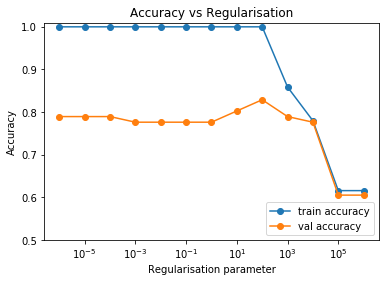

In [63]:
# plot results in graph
plt.semilogx(lr_param, lr_trainlist, label='train accuracy', marker='o')
plt.semilogx(lr_param, lr_testlist, label='val accuracy', marker='o')
plt.ylim([0.5,1.01])
plt.xlabel('Regularisation parameter')
plt.ylabel('Accuracy')
plt.title("Accuracy vs Regularisation", loc='center')
plt.legend(loc='lower right')
plt.show()

For $\lambda$ < 1, the training accuracy was maximised at 100 % while test accuracy showed no improvement due to overfitting. As $\lambda$ increases from 1 to 100, the test accuracy increases as the weights are penalised more and the model is able to generalise more. For $\lambda$ > 100, the training accuracy rapidly decreases due to underfitting. The highest accuracy obtained for logistic regression was thus 82.9 % at $\lambda$ = 100. 

# Neural Networks
<hr>

## Pre-Processing

Before we can feed the data into networks, we need to resize all images (both "yes" and "no" set) into the same size (224x224x3). You can see that height of the image is now 224 pixels, width is 224 and there are 3 colour channels in the matrix (Blue,green,red). We need to convert the arrangement for colour channels from (B,G,R) to (R,G,B) since tenorflow packages takes  input of shape (image_height, image_width, color_channels) with colour channels arrange in (R,G,B) order. 

In [64]:
##Pre-processing
#resize all image to the same size (224,224) and place them in lists
X_nn=[]
for file in yes:
    img = cv2.imread('./brain_tumor_dataset/yes/'+file)
    img = cv2.resize(img, (224, 224) )#Height of image is 224 pixels, width is 224 pixels and there are 3 colour channels in the matrix (Blue,green,red)   
    (b, g, r)=cv2.split(img)#convert (b,g,r) to (r,g,b) since CNN takes input of shape  (image_height, image_width, color_channels)
    #color_channels refers to (R,G,B)
    img=cv2.merge([r,g,b])
    X_nn.append(img)

for file in no:
    img = cv2.imread('./brain_tumor_dataset/no/'+file)
    img = cv2.resize(img, (224, 224) )
    (b, g, r)=cv2.split(img) 
    img=cv2.merge([r,g,b])
    X_nn.append(img)


image dimensions= (224, 224, 3)


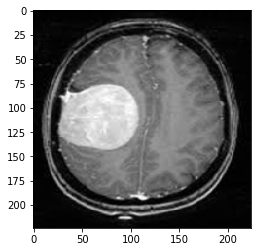

In [65]:
#visualise 1 image
print("image dimensions=",X_nn[0].shape)#an image has height 224, width 224 and 3 colour channels- currently in (r,g,b)
plt.imshow(X_nn[0], interpolation='nearest')

You can see that there are a total of 253 processed image matrices (from both "yes" and "no" set) of size (224x224x3) stored in X. 

In [66]:
X_nn = np.asarray(X_nn)#convert the list of image matrices to an array
print('Shape of matrix with image stored as matrices(224x224x3) =',X_nn.shape)

# number of data
n = X_nn.shape[0] 
print('Number of training data=',n)

Shape of matrix with image stored as matrices(224x224x3) = (253, 224, 224, 3)
Number of training data= 253


Pixel values are often integers in the range between 0 and 255, which can be computationally expensive for our models. To lower computational cost, we can normalise pixel values to a range between zero and one.

In [67]:
#normalize data
X_nn = X_nn.astype('float32')
X_nn /= 255

We split the image data into 70% of training data and 30% of testing data by using the same indexes for the original training set and test set as defined above. This is to ensure that the only difference between the new train/test sets (i.e. X_train_nn, X_test_nn) and original train/test sets (i.e. X_train, X_test) will be the pre-processing of the image data. 

Labels in both train and test set will remain the same as the orginal train and test set (i.e. y_train, y_test).

In [68]:
#split  image data with into training set and test set
from random import sample
X_train_nn, X_test_nn= [],[]
print('test_index=',test_index)
#use the same indexes for both orginal train/test sets and neural networks train/test sets to generate the same image data for both test sets
#only difference will be the pre-processing of the image data
#labels in both train and test set will remain the same as the orginal train and test set

for i in range(n):
    if i in test_index:
        X_test_nn.append(X_nn[i])

    else:
        X_train_nn.append(X_nn[i])

X_train_nn = np.asarray(X_train_nn)
X_test_nn = np.asarray(X_test_nn)


test_index= [134, 33, 236, 222, 103, 125, 70, 234, 226, 7, 14, 69, 191, 142, 51, 246, 12, 2, 84, 130, 50, 173, 200, 76, 35, 102, 54, 114, 149, 178, 189, 186, 161, 115, 184, 91, 235, 121, 32, 238, 133, 243, 56, 118, 137, 247, 87, 135, 80, 198, 65, 194, 228, 40, 73, 116, 241, 220, 197, 19, 187, 188, 219, 218, 126, 227, 15, 78, 34, 185, 96, 8, 150, 113, 67, 167]


## Convolutional Neural Network (CNN)

### Create the model

In [69]:
import tensorflow as tf
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import regularizers

import h5py
from keras.callbacks import EarlyStopping, ModelCheckpoint

import matplotlib.pyplot as plt

c:\users\zachary\miniconda3\envs\ce9010_2020\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\zachary\miniconda3\envs\ce9010_2020\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\zachary\miniconda3\envs\ce9010_2020\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\zachary\miniconda3\envs\ce9010_2020\l

#### 1. Feature Extraction From Image

The model consists of three convolution blocks with a max pool layer in each of them:

In [70]:
#add convolutional layers
base_model = Sequential()
base_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224,224,3)))
base_model.add(MaxPooling2D(pool_size=(2, 2)))

base_model.add(Conv2D(32, (3, 3), activation='relu'))
base_model.add(MaxPooling2D(pool_size=(2, 2)))

base_model.add(Conv2D(64, (3, 3), activation='relu'))
base_model.add(MaxPooling2D(pool_size=(2, 2)))

In [71]:
base_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 64)        0         
Total params: 28,640
Trainable params: 28,640
Non-trainable params: 0
__________________________________________________

- __Conv2D__<br>

The first Conv2D layer’s input_shape is 224x224 pixels and 3 channels is associated with each image in (r,g,b)(dimension=224x224x3).

The Conv2D layer has a filter size of 3x3. We take this 3x3 x 3(colour channels) filter and slide it over the complete image and along the way take the dot product between the filter and and small 3x3x3 chunks of the input image:

$$
w^Tx+b 
$$
with w = filter, b = bias.

For every dot product taken, the result is a scalar.

After convolving the entire image with the filter, we get a feature map of shape 222x222x1. This means that there are 222x222 unique positions where the filter can be put on the image.

The Conv2D layer comprises of a set of 32 independent filters. Each filter is independently convolved with the image and we end up with 32 feature maps of shape 222x222x1. We stack these up to get an output shape of 222x222x32 as seen in conv2d_1 layer.

The purpose of the Convolution layers is to automatically extract meaningful features from the input image. Convolution preserves the spatial relationship between pixels by learning image features using small chunks of input image. Lower layers detect simple structures like shapes/edges, as we go deeper the layers build on top of each other and learn to encode more complex patterns like eyes/nose.

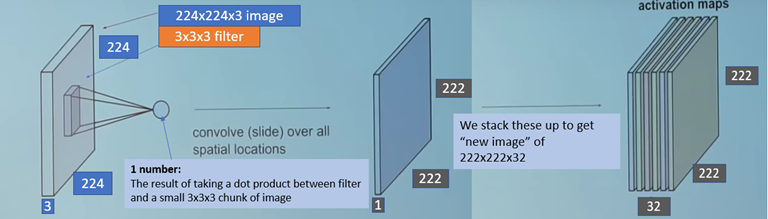

- __Relu__<br>

ReLU is an element wise operation (applied per pixel) and replaces all negative pixel values in the feature map by zero. The purpose of ReLU is to introduce non-linearity in our network.

- __MaxPooling2D__<br>

MaxPooling2D has a filter size of 2x2. It’ll slide over the 222x222 picture and select the pixel with max value. This effectively reduces the image size by half. Therefore 222x222 pic becomes a pic size of 111x111.

The purpose of the pooling layers is to progressively reduce the spatial size of the representation to reduce the amount of parameters, hence making the network less computationally expensive, while still retaining most of the useful information from visual inputs. 

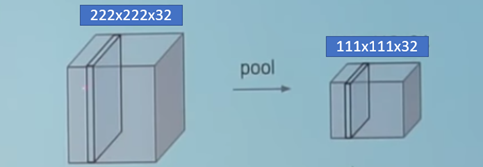

#### 2. Classification

- __Fully Connected Layers__<br>

On top of CNN, we add two fully-connected layers. The model consist of a hidden layer with 64 output units and a final layer with a single output unit and a sigmoid activation. Sigmoid function is perfect for a binary classification since it converts the classifier's raw input value into a probability in the range [0,1].

In [72]:
#binary classifier
model=Sequential()
model.add(base_model)#add convolutional layers
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
#add densely connected layers-fully connected layers:
model.add(Dense(64, activation='relu'))#64 neuron hidden layer
model.add(Dense(1, activation='sigmoid'))#convert classifier’s raw output values into probability in the range [0,1] i.e. P(y=1)

Backpropagation is used to optimise filter values and weights in fully connected layer by calculating the gradients of the error with respect to all weights in the network and use gradient descent to update all filter values / weights to minimise output error. 

### Compile the model

To go with it we will also use the binary_crossentropy loss/log loss to train our model. 

We will be using RMSprop optimization algorithm since it automates learning rate tuning for us. 

In [73]:
model.compile(loss='binary_crossentropy',#Computes the cross-entropy loss between true labels and predicted labels.
              optimizer='rmsprop',#adaptative learning rate optimizer 
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Model summary

View all the layers of the network using the model's summary method:

In [74]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 26, 26, 64)        28640     
_________________________________________________________________
flatten_1 (Flatten)          (None, 43264)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2768960   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 2,797,665
Trainable params: 2,797,665
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [75]:
# Set callback functions to save the best model so far
callbacks = [#EarlyStopping(monitor='val_accuracy', mode='max', patience=5),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True)]

In [76]:
#train the model
history = model.fit(X_train_nn, y_train, epochs=20, #epoch: number of times entire dataset is passed through the neural network
                    callbacks=callbacks,
                    validation_data=(X_test_nn, y_test))


Train on 177 samples, validate on 76 samples
Epoch 1/20
177/177 [==============================] - 11s 62ms/step - loss: 1.0350 - accuracy: 0.6045 - val_loss: 0.5763 - val_accuracy: 0.6974
Epoch 2/20
177/177 [==============================] - 7s 40ms/step - loss: 0.6155 - accuracy: 0.6610 - val_loss: 0.5330 - val_accuracy: 0.8553
Epoch 3/20
177/177 [==============================] - 6s 32ms/step - loss: 0.5300 - accuracy: 0.7458 - val_loss: 0.4658 - val_accuracy: 0.8553
Epoch 4/20
177/177 [==============================] - 6s 35ms/step - loss: 0.4808 - accuracy: 0.7966 - val_loss: 0.3855 - val_accuracy: 0.8816
Epoch 5/20
177/177 [==============================] - 6s 31ms/step - loss: 0.3949 - accuracy: 0.8305 - val_loss: 0.4211 - val_accuracy: 0.8947
Epoch 6/20
177/177 [==============================] - 13s 73ms/step - loss: 0.4366 - accuracy: 0.7853 - val_loss: 0.3803 - val_accuracy: 0.8947
Epoch 7/20
177/177 [==============================] - 11s 63ms/step - loss: 0.2675 - accuracy:

### Visualize training results

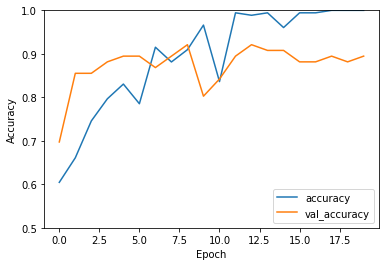

In [77]:
#visualise the results
#accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


test_loss, test_acc = model.evaluate(X_test_nn,  y_test, verbose=2)#there may be overfitting

From the accuracy graph above, it can be seen that validation accuracy stops improving after a certain number of epochs while the training accuracy continues to increase, resulting in a significant gap between training and validation accuracy. This is a sign of overfitting, since the model learned patterns that are too specific to the training data, but fails to generalise on the test data. 

### Evaluate the model

In [78]:
# load the saved best model 
from keras.models import load_model
best_model = load_model('best_model.h5')


best_test_loss, best_test_acc = best_model.evaluate(X_test_nn,  y_test, verbose=2)

In [79]:
print('accuracy of test set=',best_test_acc)

accuracy of test set= 0.9210526347160339


In [80]:
print(y_test)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [81]:
# validate on val set
predictions = best_model.predict(X_test_nn)
predictions = [1 if x>0.5 else 0 for x in predictions]
print(predictions)
print('accuracy of test set =',compute_accuracy(predictions,y_test))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
accuracy of test set = 0.9210526315789473


## Overfitting

### Adding Dropout Layer

One way to deal with the overfitting problem is to apply dropout layers. A Dropout layer will randomly remove output features of a layer by setting it to zero. When applying 0.5 dropout to a certain layer, it randomly removes 50% of the output units in each training epoch. This helps to avoid overfitting on the training dataset.

In [82]:
#binary classifier + dropout layer
drop_model=Sequential()
drop_model.add(base_model) #add convolutional layers
drop_model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
#add densely connected layers-fully connected layers:
drop_model.add(Dense(64, activation='relu'))#64 neuron hidden layer
drop_model.add(Dropout(0.5))#apply dropout
drop_model.add(Dense(1, activation='sigmoid'))#convert classifier’s raw output values into probability in the range [0,1] i.e. P(y=1)

### Compile the model

After introducing dropout to the network, compile the model and view the layers summary.

In [83]:
drop_model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',#adaptative learning rate optimizer 
              metrics=['accuracy'])

In [84]:
drop_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 26, 26, 64)        28640     
_________________________________________________________________
flatten_2 (Flatten)          (None, 43264)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2768960   
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 2,797,665
Trainable params: 2,797,665
Non-trainable params: 0
_________________________________________________________________


In [85]:
# Set callback functions to save the best model so far
callbacks = [#EarlyStopping(monitor='val_accuracy', mode='max', patience=5),
             ModelCheckpoint(filepath='drop_best_model.h5', monitor='val_accuracy', save_best_only=True)]

### Train the model

After successfully adding a dropout layer to the network, train this new network:

In [86]:
#train the model
drop_history = drop_model.fit(X_train_nn, y_train, epochs=20,
                    callbacks=callbacks,
                    validation_data=(X_test_nn, y_test))

Train on 177 samples, validate on 76 samples
Epoch 1/20
177/177 [==============================] - 8s 45ms/step - loss: 0.8678 - accuracy: 0.6271 - val_loss: 0.4301 - val_accuracy: 0.8684
Epoch 2/20
177/177 [==============================] - 6s 32ms/step - loss: 0.4782 - accuracy: 0.7853 - val_loss: 0.3927 - val_accuracy: 0.8816
Epoch 3/20
177/177 [==============================] - 8s 46ms/step - loss: 0.4192 - accuracy: 0.8023 - val_loss: 0.3596 - val_accuracy: 0.9079
Epoch 4/20
177/177 [==============================] - 7s 40ms/step - loss: 0.3654 - accuracy: 0.8475 - val_loss: 0.3739 - val_accuracy: 0.8553
Epoch 5/20
177/177 [==============================] - 5s 29ms/step - loss: 0.2304 - accuracy: 0.8983 - val_loss: 0.3720 - val_accuracy: 0.8553
Epoch 6/20
177/177 [==============================] - 7s 42ms/step - loss: 0.2232 - accuracy: 0.9096 - val_loss: 0.3549 - val_accuracy: 0.8947
Epoch 7/20
177/177 [==============================] - 7s 39ms/step - loss: 0.1506 - accuracy: 0.9

### Visualize training results

Visualize the new model after training. We expect to see that there is less overfitting than before. The accuracy should go up after training the model for more epochs. However, dropout does not seem to improve our accuracy much. Sometimes, it even makes our accuracy worse! This is probably because output features are removed at random. This means that some important features that help us distinguish between the 2 classes may be removed, which impedes the accuracy of our model.

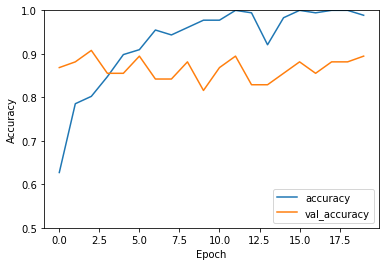

In [87]:
#visualise the results
#accuracy
plt.plot(drop_history.history['accuracy'], label='accuracy')
plt.plot(drop_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


drop_test_loss, drop_test_acc = drop_model.evaluate(X_test_nn,  y_test, verbose=2)

### Evaluate the model

In [88]:
# load the saved best model 
drop_best_model = load_model('drop_best_model.h5')

drop_best_test_loss, drop_best_test_acc = drop_best_model.evaluate(X_test_nn,  y_test, verbose=2)

In [89]:
print('accuracy of test set=',drop_best_test_acc)

accuracy of test set= 0.9078947305679321


In [90]:
# validate on val set
drop_predictions = drop_best_model.predict(X_test_nn)
drop_predictions = [1 if x>0.5 else 0 for x in drop_predictions]
print(drop_predictions)
print('accuracy of test set =',compute_accuracy(drop_predictions,y_test))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
accuracy of test set = 0.9078947368421053


## Overfitting

## Adding L2 Regularisation

L2 regularisation (also known as weight decay) is commonly used to tackle the problem of overfitting in neural networks. L2 regularisation was implemented in the the fully connected layer preceding the output layer. The argument made here is that the convolutional layers are responsible for extracting higher level features and no prediction is involved, hence the regularisation should not be applied there. 

### Grid Search for Regularisation

To see if regularisation actually has an impact, a grid search using various values of $\lambda$ was performed. 

In [92]:
from keras import regularizers
from keras.models import load_model

# function to build CNN models with regularisation
def nn_model_reg(param, epoch):
    # binary classifier model
    reg_model=Sequential()
    reg_model.add(base_model) # add convolutional layers
    reg_model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    # add densely connected layers-fully connected layers:
    reg_model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(param))) # 64 neuron hidden layer
    reg_model.add(Dense(1, activation='sigmoid')) # convert classifier’s raw output values into probability in the range [0,1] i.e. P(y=1)
    # compile model
    reg_model.compile(loss='binary_crossentropy', # Computes the cross-entropy loss between true labels and predicted labels.
                  optimizer='rmsprop', # adaptative learning rate optimizer 
                  metrics=['accuracy'])
    # set callback functions to save the best model so far
    callbacks = [#EarlyStopping(monitor='val_accuracy', mode='max', patience=5),
                 ModelCheckpoint(filepath='reg_best_model.h5', monitor='val_accuracy', save_best_only=True)]
    # fit model
    reg_history = reg_model.fit(X_train_nn, y_train, epochs=epoch, # epoch: number of times entire dataset is passed through the neural network
                        callbacks=callbacks,
                        validation_data=(X_test_nn, y_test))
    # load the saved best model    
    reg_best_model = load_model('reg_best_model.h5')
    _, reg_best_test_acc = reg_best_model.evaluate(X_test_nn,  y_test, verbose=2)
    _, reg_best_train_acc = reg_best_model.evaluate(X_train_nn,  y_train, verbose=2)
    return reg_best_train_acc, reg_best_test_acc

In [98]:
# range of powers for regularisation parameter
param_start, param_end = -3, 3
reg_param, all_train, all_test = [], [], []
# grid search algorithm
for i in range(param_start, param_end+1):
    param = 10**i
    print("Run {} out of {}".format(i - param_start + 1, param_end - param_start + 1))
    reg_best_train_acc, reg_best_test_acc = nn_model_reg(param, 20)
    reg_param.append(param)
    all_train.append(reg_best_train_acc)
    all_test.append(reg_best_test_acc)

Run 1 out of 7
Train on 177 samples, validate on 76 samples
Epoch 1/20
177/177 [==============================] - 7s 40ms/step - loss: 0.7841 - accuracy: 0.7175 - val_loss: 0.5068 - val_accuracy: 0.8816
Epoch 2/20
177/177 [==============================] - 6s 35ms/step - loss: 0.4282 - accuracy: 0.8531 - val_loss: 0.4354 - val_accuracy: 0.9079
Epoch 3/20
177/177 [==============================] - 10s 59ms/step - loss: 0.2497 - accuracy: 0.9209 - val_loss: 0.4620 - val_accuracy: 0.8947
Epoch 4/20
177/177 [==============================] - 8s 44ms/step - loss: 0.1268 - accuracy: 0.9774 - val_loss: 0.7506 - val_accuracy: 0.8553
Epoch 5/20
177/177 [==============================] - 9s 49ms/step - loss: 0.2381 - accuracy: 0.9379 - val_loss: 0.5102 - val_accuracy: 0.8947
Epoch 6/20
177/177 [==============================] - 7s 39ms/step - loss: 0.0901 - accuracy: 0.9944 - val_loss: 0.6379 - val_accuracy: 0.9211
Epoch 7/20
177/177 [==============================] - 8s 43ms/step - loss: 0.0568

Epoch 17/20
177/177 [==============================] - 8s 43ms/step - loss: 0.2395 - accuracy: 0.9831 - val_loss: 0.7107 - val_accuracy: 0.8026
Epoch 18/20
177/177 [==============================] - 8s 46ms/step - loss: 0.3734 - accuracy: 0.9435 - val_loss: 0.6223 - val_accuracy: 0.9342
Epoch 19/20
177/177 [==============================] - 9s 52ms/step - loss: 0.2566 - accuracy: 0.9831 - val_loss: 0.5251 - val_accuracy: 0.8816
Epoch 20/20
177/177 [==============================] - 9s 48ms/step - loss: 0.4859 - accuracy: 0.8757 - val_loss: 0.6398 - val_accuracy: 0.9079
Run 4 out of 7
Train on 177 samples, validate on 76 samples
Epoch 1/20
177/177 [==============================] - 8s 46ms/step - loss: 42.2106 - accuracy: 0.6102 - val_loss: 2.8467 - val_accuracy: 0.8684
Epoch 2/20
177/177 [==============================] - 9s 50ms/step - loss: 1.5128 - accuracy: 0.7910 - val_loss: 0.8794 - val_accuracy: 0.7237
Epoch 3/20
177/177 [==============================] - 5s 31ms/step - loss: 0.

### Visualisation of Grid Search Results

Reg. parameter: 0.001000, Train accuracy: 1.000, Test accuracy: 0.921
Reg. parameter: 0.010000, Train accuracy: 0.994, Test accuracy: 0.934
Reg. parameter: 0.100000, Train accuracy: 0.966, Test accuracy: 0.934
Reg. parameter: 1.000000, Train accuracy: 0.910, Test accuracy: 0.921
Reg. parameter: 10.000000, Train accuracy: 0.819, Test accuracy: 0.921
Reg. parameter: 100.000000, Train accuracy: 0.689, Test accuracy: 0.855
Reg. parameter: 1000.000000, Train accuracy: 0.706, Test accuracy: 0.789


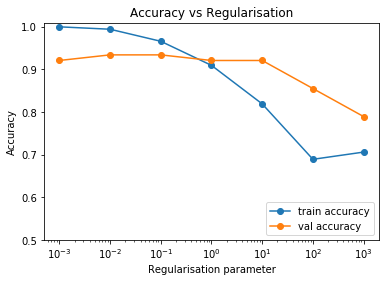

In [102]:
# display results of grid search
for i in range(len(reg_param)):
    print('Reg. parameter: %f, Train accuracy: %.3f, Test accuracy: %.3f' % (reg_param[i], all_train[i], all_test[i]))
    
# plot results in graph
plt.semilogx(reg_param, all_train, label='train accuracy', marker='o')
plt.semilogx(reg_param, all_test, label='val accuracy', marker='o')
plt.ylim([0.5,1.01])
plt.xlabel('Regularisation parameter')
plt.ylabel('Accuracy')
plt.title("Accuracy vs Regularisation", loc='center')
plt.legend(loc='lower right')
plt.show()

For $\lambda$ < 10$^{-2}$, the training accuracy was maximised at 100 % while test accuracy showed no improvement due to overfitting. As $\lambda$ increases from 10$^{-2}$ to 10, the test accuracy increases as the weights are penalised more and the model is able to generalise more. For  𝜆  > 10, both training and test accuracies plunge due to underfitting. 

The best performance showed only 1 % accuracy improvement over the base case without regularisation. Furthermore, due to the stochastic nature of neural networks and regularisation, the model was not very stable and gave slight variations for the same $\lambda$ values (not shown here). 

To make the model more stable and the results more reproducible, there are 2 general methods:
1. Fixing the seed.
2. Statistical approach of getting the average performance over many iterations.

### Fixing Seed

We attempted to fix the seeds used by the random number generators in Numpy and Keras. A sample test in which 3 iterations/ repetitions were run for $\lambda$ = 0.01. 

In [104]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(1)

for i in range(0, 3):
    param = 0.01
    reg_best_train_acc, reg_best_test_acc = nn_model_reg(param, 20)
    print("Run {}, Train accuracy = {:.3f}, Test accuracy = {:.3f}".format(i+1, reg_best_train_acc, reg_best_test_acc))

Train on 177 samples, validate on 76 samples
Epoch 1/20
177/177 [==============================] - 8s 44ms/step - loss: 1.2283 - accuracy: 0.7119 - val_loss: 0.4981 - val_accuracy: 0.8684
Epoch 2/20
177/177 [==============================] - 9s 49ms/step - loss: 0.2891 - accuracy: 0.9096 - val_loss: 0.4762 - val_accuracy: 0.8421
Epoch 3/20
177/177 [==============================] - 10s 57ms/step - loss: 0.1642 - accuracy: 0.9605 - val_loss: 0.4743 - val_accuracy: 0.8421
Epoch 4/20
177/177 [==============================] - 5s 26ms/step - loss: 0.1034 - accuracy: 0.9944 - val_loss: 0.6123 - val_accuracy: 0.8947
Epoch 5/20
177/177 [==============================] - 8s 44ms/step - loss: 0.0586 - accuracy: 0.9944 - val_loss: 0.5964 - val_accuracy: 0.8816
Epoch 6/20
177/177 [==============================] - 6s 35ms/step - loss: 0.0495 - accuracy: 1.0000 - val_loss: 0.5241 - val_accuracy: 0.8816
Epoch 7/20
177/177 [==============================] - 8s 44ms/step - loss: 0.0836 - accuracy: 0.

For all 3 iterations, both training and test accuracies showed slight variations. 

### Average Accuracy Over Multiple Iterations

To see if regularisation really had a postiive impact on accuracy, we ran 10 iterations for the optimal range of $\lambda$ values as found previously in the grid search (i.e. $\lambda$ = 10$^{-4}$, 10$^{-2}$, 1).

In [112]:
# list of regularisation parameters to test
param_list = [1e-4, 1e-2, 1]
# number of repeats for each regularisation parameter
reg_iter = 10
# array of train and test accuracies for all repeats. each row is for a parameter and the columns are the repeats
all_train_acc = all_test_acc = np.zeros((len(param_list),reg_iter))

# grid search algorithm
for j in range(len(param_list)):
    for i in range(0, reg_iter):
        print("Parameter {}, Iteration {} out of {}".format(j + 1, i + 1, reg_iter))
        reg_best_train_acc, reg_best_test_acc = nn_model_reg(param_list[j], 20)
        all_train_acc[j,i] = reg_best_train_acc
        all_test_acc[j,i] = reg_best_test_acc

Parameter 1, Iteration 1 out of 10
Train on 177 samples, validate on 76 samples
Epoch 1/20
177/177 [==============================] - 6s 35ms/step - loss: 1.5703 - accuracy: 0.6045 - val_loss: 0.3491 - val_accuracy: 0.8684
Epoch 2/20
177/177 [==============================] - 5s 30ms/step - loss: 0.2143 - accuracy: 0.9266 - val_loss: 0.3706 - val_accuracy: 0.8289
Epoch 3/20
177/177 [==============================] - 5s 28ms/step - loss: 0.0769 - accuracy: 0.9831 - val_loss: 0.3418 - val_accuracy: 0.9079
Epoch 4/20
177/177 [==============================] - 9s 54ms/step - loss: 0.0292 - accuracy: 1.0000 - val_loss: 0.5624 - val_accuracy: 0.8816
Epoch 5/20
177/177 [==============================] - 9s 49ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.4645 - val_accuracy: 0.8553
Epoch 6/20
177/177 [==============================] - 8s 44ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.6119 - val_accuracy: 0.8553
Epoch 7/20
177/177 [==============================] - 7s 41ms/

177/177 [==============================] - 7s 40ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.8911 - val_accuracy: 0.8947
Epoch 12/20
177/177 [==============================] - 7s 38ms/step - loss: 9.8423e-04 - accuracy: 1.0000 - val_loss: 0.9211 - val_accuracy: 0.8947
Epoch 13/20
177/177 [==============================] - 13s 74ms/step - loss: 9.2114e-04 - accuracy: 1.0000 - val_loss: 0.8984 - val_accuracy: 0.9079
Epoch 14/20
177/177 [==============================] - 9s 53ms/step - loss: 1.0360 - accuracy: 0.8757 - val_loss: 0.5285 - val_accuracy: 0.8816
Epoch 15/20
177/177 [==============================] - 7s 38ms/step - loss: 0.0247 - accuracy: 1.0000 - val_loss: 0.5563 - val_accuracy: 0.8816
Epoch 16/20
177/177 [==============================] - 7s 42ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.5796 - val_accuracy: 0.8947
Epoch 17/20
177/177 [==============================] - 5s 30ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.6445 - val_accuracy: 0.

177/177 [==============================] - 7s 38ms/step - loss: 1.2775 - accuracy: 0.7401 - val_loss: 0.4531 - val_accuracy: 0.8947
Epoch 2/20
177/177 [==============================] - 5s 29ms/step - loss: 0.2132 - accuracy: 0.9718 - val_loss: 0.4074 - val_accuracy: 0.8816
Epoch 3/20
177/177 [==============================] - 5s 30ms/step - loss: 0.1035 - accuracy: 1.0000 - val_loss: 0.4812 - val_accuracy: 0.8816
Epoch 4/20
177/177 [==============================] - 4s 25ms/step - loss: 0.0794 - accuracy: 1.0000 - val_loss: 0.4892 - val_accuracy: 0.8947
Epoch 5/20
177/177 [==============================] - 11s 65ms/step - loss: 0.0648 - accuracy: 1.0000 - val_loss: 0.5144 - val_accuracy: 0.8816
Epoch 6/20
177/177 [==============================] - 9s 49ms/step - loss: 0.0541 - accuracy: 1.0000 - val_loss: 0.6419 - val_accuracy: 0.8158
Epoch 7/20
177/177 [==============================] - 7s 42ms/step - loss: 0.0505 - accuracy: 1.0000 - val_loss: 0.5417 - val_accuracy: 0.8947
Epoch 8/2

177/177 [==============================] - 5s 29ms/step - loss: 0.0253 - accuracy: 1.0000 - val_loss: 0.7056 - val_accuracy: 0.8553
Epoch 18/20
177/177 [==============================] - 6s 34ms/step - loss: 0.0217 - accuracy: 1.0000 - val_loss: 0.7290 - val_accuracy: 0.8816
Epoch 19/20
177/177 [==============================] - 8s 46ms/step - loss: 0.0198 - accuracy: 1.0000 - val_loss: 0.7069 - val_accuracy: 0.8816
Epoch 20/20
177/177 [==============================] - 4s 25ms/step - loss: 0.1287 - accuracy: 0.9435 - val_loss: 0.6179 - val_accuracy: 0.9079
Parameter 2, Iteration 5 out of 10
Train on 177 samples, validate on 76 samples
Epoch 1/20
177/177 [==============================] - 7s 40ms/step - loss: 1.0482 - accuracy: 0.7119 - val_loss: 0.4331 - val_accuracy: 0.8289
Epoch 2/20
177/177 [==============================] - 7s 40ms/step - loss: 0.2018 - accuracy: 0.9605 - val_loss: 0.4319 - val_accuracy: 0.8158
Epoch 3/20
177/177 [==============================] - 6s 32ms/step - l

177/177 [==============================] - 5s 26ms/step - loss: 0.0663 - accuracy: 0.9887 - val_loss: 0.6584 - val_accuracy: 0.8421
Epoch 8/20
177/177 [==============================] - 8s 48ms/step - loss: 0.0820 - accuracy: 0.9887 - val_loss: 0.6948 - val_accuracy: 0.8421
Epoch 9/20
177/177 [==============================] - 7s 41ms/step - loss: 0.0413 - accuracy: 1.0000 - val_loss: 0.7310 - val_accuracy: 0.8816
Epoch 10/20
177/177 [==============================] - 6s 32ms/step - loss: 0.0345 - accuracy: 1.0000 - val_loss: 0.6972 - val_accuracy: 0.8816
Epoch 11/20
177/177 [==============================] - 8s 45ms/step - loss: 0.0298 - accuracy: 1.0000 - val_loss: 0.7207 - val_accuracy: 0.8947
Epoch 12/20
177/177 [==============================] - 6s 32ms/step - loss: 0.0262 - accuracy: 1.0000 - val_loss: 0.6951 - val_accuracy: 0.8816
Epoch 13/20
177/177 [==============================] - 6s 32ms/step - loss: 0.0240 - accuracy: 1.0000 - val_loss: 0.6160 - val_accuracy: 0.7763
Epoch 

Epoch 18/20
177/177 [==============================] - 6s 34ms/step - loss: 0.8581 - accuracy: 0.9605 - val_loss: 1.9474 - val_accuracy: 0.7632
Epoch 19/20
177/177 [==============================] - 7s 40ms/step - loss: 1.0146 - accuracy: 0.9605 - val_loss: 1.3433 - val_accuracy: 0.8553
Epoch 20/20
177/177 [==============================] - 8s 46ms/step - loss: 0.9034 - accuracy: 0.9831 - val_loss: 1.2526 - val_accuracy: 0.8947
Parameter 3, Iteration 6 out of 10
Train on 177 samples, validate on 76 samples
Epoch 1/20
177/177 [==============================] - 8s 47ms/step - loss: 42.4470 - accuracy: 0.7458 - val_loss: 3.3815 - val_accuracy: 0.8421
Epoch 2/20
177/177 [==============================] - 6s 35ms/step - loss: 1.4007 - accuracy: 0.9831 - val_loss: 0.8217 - val_accuracy: 0.9211
Epoch 3/20
177/177 [==============================] - 8s 43ms/step - loss: 0.5142 - accuracy: 0.9435 - val_loss: 1.1250 - val_accuracy: 0.8816
Epoch 4/20
177/177 [==============================] - 6s 3

In [118]:
for j in range(len(param_list)):
    print('Parameter = {:.4f}, Mean train accuracy = {:.5f}, Train std = {:.5f}, Mean test accuracy = {:.5f}, Test std = {:.5f}'.format(param_list[j], np.mean(all_train_acc[j,:]), np.std(all_train_acc[j,:]), np.mean(all_test_acc[j,:]), np.std(all_test_acc[j,:])))

Parameter = 0.0001, Mean train accuracy = 0.90395, Train std = 0.01028, Mean test accuracy = 0.90395, Test std = 0.01028
Parameter = 0.0100, Mean train accuracy = 0.91711, Train std = 0.01562, Mean test accuracy = 0.91711, Test std = 0.01562
Parameter = 1.0000, Mean train accuracy = 0.91316, Train std = 0.01206, Mean test accuracy = 0.91316, Test std = 0.01206


One thing to note is that only 10 iterations were done instead of conventional 30 due to long training times. Nevertheless, after measuring the average test accuracy for different values of $\lambda$, we can see that we get more representative values of the overall performance, which are lower than without any regularisation. This is perhaps down to the random nature of regularisation in CNNs that result in penalising of important weights more often than not. 

# Conclusion

## Summary:

### 1. Principal Component Analysis (PCA)
We used PCA to reduce the dimensionality of our image data.

### 2. K-means
 - K-means is not a good choice as it only achieves about 50 something % accuracy.
 - Even with full dimensionality (50176 features), accuracy still did not improve. This means that the poor performance is not attributed to reduction of dimensions by PCA.
 - K-means++ did not improve accuracy either. This means that the poor performance of K-MEANS is unlikely due to poor initialisation. Also, we probably have already accounted for initialisation issues with random initialisation by running the K-MEANS algorithm 100 times and picking the solution with the smallest loss value. 


### 3. Logistic Regression
Logistic Regression did better with about 80 something % accuracy.

### 4. Convolutional Neural Networks (CNN)
 - We used CNN to automatically extract more meaningful features, which is probably why CNN perform the best with about 80 something % to 90% accuracy.
 - We tried to reduce overfitting issues by adding dropout layer, which randomly remove output features of a layer in the network. However, since output features are removed at random, at times it worsens the performance of our model as meaningful features may be removed when dropping out.
 - We also tried regularisation, which after averaging performed worse than without regularization. This was probably due to the minimisation of important weights in the fully connected layer. 

## Conclusion: 
To conclude, in terms of accuracy, CNN performs the best (80 something % to 90%) followed by logistic regression (80 something %). K-means should not be considered since accuracy is 50 something %, which means classification is almost random. Dimensionality reduction by PCA does not help to improve accuracy, but improves algorithm runtime. This is because k Principal Components that captures most of the variance of our data may not be meaningful features. In fact, lesser features means lesser information. On the other hand, CNN helps to automatically extract more meaningful features, which helps boost accuracy. 
 
## Future work:

### 1. CNN
- Since CNN produces the best accuracy, future work should be focused on improving the CNN model: 
- Attempt more ways to deal with overfitting issue in CNN:
    1. Increase the dataset
    2. Cross-validation
    3. Reduce the network’s capacity 
    4. Image Data Augmentation

- CNN accuracy can be further improved by tuning parameters (no of epochs, learning rate, optimizers).

### 2. Overall
- Consider other evaluation metrics besides accuracy (precision, recall, F1)

# Resources
1. All Tutorials and Lectures from CE9010 module taught by Prof Xavier Bresson.
2. Read image:
    - https://pythonexamples.org/python-opencv-read-image-cv2-imread/
3. Pre-process image:
    - https://www.oreilly.com/library/view/programming-computer-vision/9781449341916/ch01.html
4. Arrange image in subplots:
    - https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html
5. Understanding pca:
    - https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python
6. Understanding KMEANS++:
    - https://www.geeksforgeeks.org/ml-k-means-algorithm/
7. Neural Networks image classification:
    - https://www.tensorflow.org/tutorials/images/cnn
    - https://www.tensorflow.org/tutorials/images/classification
9. Understanding CNN:
    - https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2
    - https://medium.com/technologymadeeasy/the-best-explanation-of-convolutional-neural-networks-on-the-internet-fbb8b1ad5df8
10. How to deal with overfitting:
    - https://towardsdatascience.com/handling-overfitting-in-deep-learning-models-c760ee047c6e
    - https://elitedatascience.com/overfitting-in-machine-learning
    - https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-learning-with-weight-regularization/
11. Stochastic nature of NN and how to improve reproducibility:
    - https://machinelearningmastery.com/reproducible-results-neural-networks-keras/
12. How to improve CNN accuracy:
    - https://medium.com/@dipti.rohan.pawar/improving-performance-of-convolutional-neural-network-2ecfe0207de7